 <br />
<img src= "https://github.com/nooksack-indian-tribe/CurvyLapseRate/blob/master/Images4Notebooks/nooksack-tribe-logo.jpg?raw=true"
style="float:left;width:175px;padding:20px">   
<br />
# Elevation distributed microclimatology data in the Nooksack Watershed

## Case study:  Nooksack River Watershed 
Code for processing sub-daily temperature sensor data for analysis of elevation distributed micro-climatology processes in a coastal glaciated watershed.  For 2016-2018 datasets, variables include air temperature, ground temperature, and relative humidity. Code generates visualization and publication of daily data in multiple formats (1) daily data in python dictionaries for analysis (2) daily data for visualization and publication on HydroServer at data.cuahsi.org (ODM1 format), and (3) archive publication on the HydroShare repository (ODM2 format)). This data is compiled to digitally observe the Nooksack Watershed.

Use this Jupyter Notebook to: <br />
* 1. Import & plot 3-4 hourly raw sensor data for quality control, <br /> 
* 2. Filter, plot & export daily data, <br /> 
* 3. Estimate, plot, & export daily lapse rates,     <br />
* 4. Generate annual average lapse rates at different elevations
* 5. Generate monthly time series and monthly average lapse rates at different elevations,  <br />
* 6. Publish data on HydroShare.  <br />

<br /> <img src="https://github.com/nooksack-indian-tribe/CurvyLapseRate/blob/master/Images4Notebooks/UWCEE_logo.jpg?raw=true" style="float:right;width:120px;padding:20px">  
#### A Watershed Dynamics Model by the Watershed Dynamics Research Group in the Civil and Environmental Engineering Department at the University of Washington 

## 1. Import Tools and Data

### Import software libraries

In [1]:
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.dates as mdates

### Import elevation for each Lapse Rate sensor as a floating point number

In [2]:
Elevation= np.genfromtxt('Elevation.csv', delimiter=',',skip_header=1)
Elevation

array([[         nan,  506.87     ],
       [         nan,          nan],
       [         nan,  664.4315757],
       [         nan, 1056.080463 ],
       [         nan, 1286.498019 ],
       [         nan, 1575.129534 ],
       [         nan, 1743.066138 ]])

#### Compare the elevations read in to the Curvy Temperature Table 1.
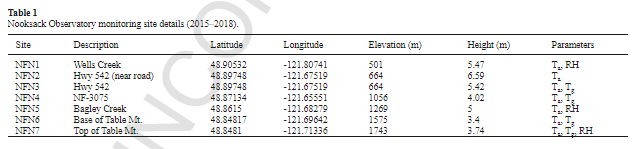

In [3]:
elev_NFN1=np.array((Elevation[0][1]), dtype='float64') #first row
#skip missing value, elevation is the same for site 2 and 3; site 2 discontinued
elev_NFN3=np.array((Elevation[2][1]), dtype='float64') 
elev_NFN4=np.array((Elevation[3][1]), dtype='float64')
elev_NFN5=np.array((Elevation[4][1]), dtype='float64')
elev_NFN6=np.array((Elevation[5][1]), dtype='float64')
elev_NFN7=np.array((Elevation[6][1]), dtype='float64')


In [4]:
elevations_km=np.array([elev_NFN1/1000, elev_NFN3/1000, elev_NFN4/1000, elev_NFN5/1000, 
                        elev_NFN6/1000, elev_NFN7/1000]) 
print(elevations_km)

[0.50687    0.66443158 1.05608046 1.28649802 1.57512953 1.74306614]


In [5]:
lapse_ODM2 = pd.read_csv('NIT_YODA_2019-11-26_data_values.csv')
lapse_ODM2

,DateTime,UTC Offset,NFN1_AT,NFN1_RH,NFN3_AT,NFN3_ST,NFN4_AT,NFN4_ST,NFN5_AT,NFN5_RH,NFN6_AT,NFN6_ST,NFN7_AT,NFN7_ST,NFN7_RH
0,12/4/2015,-8.0,NaN,NaN,1.8750,NaN,0.5000,1.7500,NaN,NaN,-2.2500,0.5,-3.046000,0.5,106.050625
1,12/5/2015,-8.0,NaN,NaN,2.3125,NaN,0.9375,1.0000,NaN,NaN,-2.0000,0.5,-2.794750,0.5,106.274750
2,12/6/2015,-8.0,NaN,NaN,3.5000,NaN,2.0000,0.9375,NaN,NaN,-1.1250,0.5,-1.914125,0.5,106.942500
3,12/7/2015,-8.0,NaN,NaN,4.0000,NaN,2.8125,1.1875,NaN,NaN,-0.1250,0.5,-0.845500,0.5,107.994375
4,12/8/2015,-8.0,NaN,NaN,5.0000,NaN,3.6250,1.5000,NaN,NaN,1.0625,0.5,0.034250,0.5,107.790500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,9/26/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,9/27/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,9/28/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,9/29/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

lapse_ODM2['date'] = pd.to_datetime(lapse_ODM2['DateTime'])
date = lapse_ODM2['date'].astype('O')
lapse_ODM2 = lapse_ODM2.set_index('DateTime')
date

0       2015-12-04 00:00:00
1       2015-12-05 00:00:00
2       2015-12-06 00:00:00
3       2015-12-07 00:00:00
4       2015-12-08 00:00:00
               ...         
1027    2018-09-26 00:00:00
1028    2018-09-27 00:00:00
1029    2018-09-28 00:00:00
1030    2018-09-29 00:00:00
1031    2018-09-30 00:00:00
Name: date, Length: 1032, dtype: object

In [ ]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_size_inches(5,5)
axs[0, 0].plot(lapse_ODM2.NFN1_AT,'tab:blue')
axs[0, 0].set_title('NFN1')
axs[0, 1].plot(lapse_ODM2.NFN3_AT, 'tab:orange')
axs[0, 1].set_title('NFN3')
axs[1, 0].plot(lapse_ODM2.NFN4_AT, 'tab:green')
axs[1, 0].set_title('NFN4')
axs[1, 1].plot(lapse_ODM2.NFN5_AT, 'tab:red')
axs[1, 1].set_title('NFN5')
axs[2, 0].plot(lapse_ODM2.NFN6_AT, 'tab:purple')
axs[2, 0].set_title('NFN6')
axs[2, 1].plot(lapse_ODM2.NFN7_AT, 'tab:olive')
axs[2, 1].set_title('NFN7')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

### Import temperature data from yearly csv files and create a time series data set

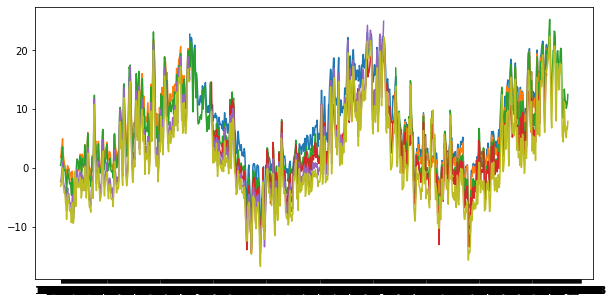

In [25]:
fig3, ax1=plt.subplots(1,1,figsize=(10, 5))
ax1.plot(lapse_ODM2.NFN1_AT,'tab:blue')
ax1.plot(lapse_ODM2.NFN3_AT, 'tab:orange')
#ax1.plot(lapse_ODM2.NFN4_AT, 'tab:green')
#ax1.plot(lapse_ODM2.NFN5_AT, 'tab:red')
#ax1.plot(lapse_ODM2.NFN6_AT, 'tab:purple')
ax1.plot(lapse_ODM2.NFN7_AT, 'tab:olive')
lapse_ODM2.to_csv('All_sites_dailyT.csv')

In [37]:
def plot_oneyear(one_year,title):
    fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
    one_year['NFN1_AT'].plot()
    one_year['NFN3_AT'].plot() #  missing part of July
    one_year['NFN4_AT'].plot() #missing part of July
    one_year['NFN5_AT'].plot() 
    one_year['NFN6_AT'].plot()
    one_year['NFN7_AT'].plot() #missing July 
    plt.ylabel('Temperature (C)')
    plt.title(title)
    plt.legend(loc='best')


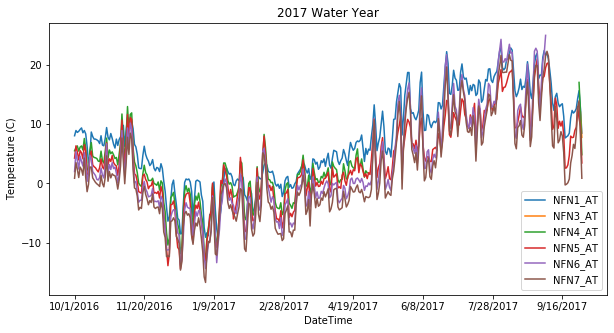

In [40]:
one_year2017 = lapse_ODM2['10/1/2016':'9/30/2017']
title ='2017 Water Year'
plot_oneyear(one_year2017,title)

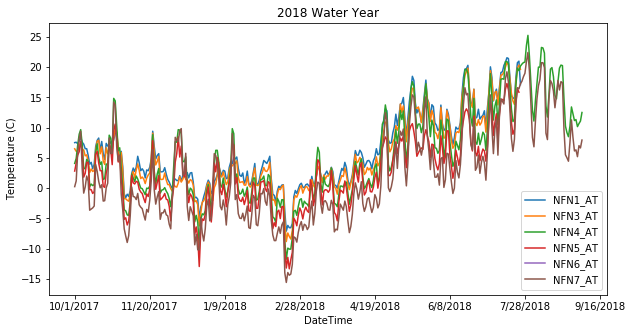

In [39]:
one_year2018 = lapse_ODM2['10/1/2017':'9/30/2018']
title ='2018 Water Year'
plot_oneyear(one_year2018,title)

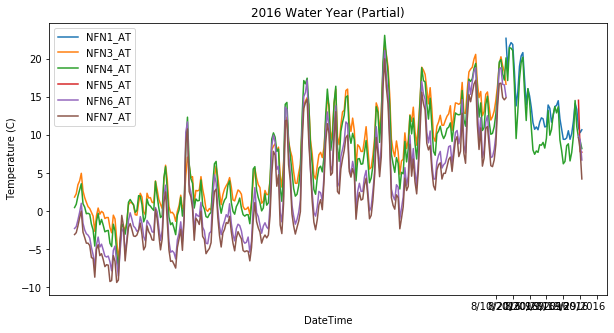

In [42]:
one_year2016 = lapse_ODM2['12/4/2015':'9/30/2016']
title ='2016 Water Year (Partial)'
plot_oneyear(one_year2016,title)

In [43]:
def analyze_one_month(one_month,label):
    """Return calculation for mean monthly Temp and plot daily values"""
    fig=plt.figure(figsize=(8, 5))
    one_month.plot()
    mean_T_month = one_month.mean()
    print("Is there a sensor missing for {value}?".format(value=label) )
    print(mean_T_month)
    mean_T_month = mean_T_month[~np.isnan(mean_T_month)]

    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    return mean_T_month 

In [45]:
may2018 = lapse_ODM2['5/1/2018':'5/31/2018']
apr2018 = lapse_ODM2['4/1/2018':'4/30/2018']

mean_T_may = analyze_one_month(may2018,"May 2018")
mean_T_apr = analyze_one_month(apr2018, "April 2018")


Is there a sensor missing for May 2018?
UTC Offset          NaN
NFN1_AT       12.984738
NFN1_RH       72.012262
NFN3_AT       12.083333
NFN3_ST             NaN
NFN4_AT       10.548387
NFN4_ST             NaN
NFN5_AT        6.914016
NFN5_RH       85.765012
NFN6_AT             NaN
NFN6_ST             NaN
NFN7_AT        7.142617
NFN7_ST             NaN
NFN7_RH       84.851387
dtype: float64
Is there a sensor missing for April 2018?
UTC Offset          NaN
NFN1_AT        5.748100
NFN1_RH       62.339858
NFN3_AT        4.550000
NFN3_ST             NaN
NFN4_AT        3.233333
NFN4_ST             NaN
NFN5_AT        1.805783
NFN5_RH       90.623942
NFN6_AT             NaN
NFN6_ST             NaN
NFN7_AT       -0.601433
NFN7_ST             NaN
NFN7_RH       95.463383
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 576x360 with 0 Axes>

ValueError: view limit minimum -36841.862550000005 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [46]:
mean_T_may

NFN1_AT    12.984738
NFN1_RH    72.012262
NFN3_AT    12.083333
NFN4_AT    10.548387
NFN5_AT     6.914016
NFN5_RH    85.765012
NFN7_AT     7.142617
NFN7_RH    84.851387
dtype: float64

In [ ]:
mean_T_apr

In [ ]:
elevations_km_mo

In [ ]:
sl_mo, int_mo, r_value, p_value, std_err = stats.linregress(elevations_km_mo, mean_T_apr)
print(sl_mo)

In [ ]:
def lapse_one_month(elevations_km_mo,one_month,label):
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(elevations_km_mo, one_month)
    
    ax = plt.subplot(111)

    LR_plot = slope
    b_plot  = int_mo

    plt.plot(elevations_km_mo,one_month,  'ro',label='Observed monthly mean emperature - May 2018')
    plt.plot(elevations_km_mo,elevations_km_mo * slope + intercept,'b-',label='Lapse rate May 2018 -4.9 degC/Km')
    plt.plot(elevations_km_mo,elevations_km_mo * (-6.5) + intercept, 'm-',label='Annual t_lr -6.5 degC/Km')
    plt.plot(elevations_km_mo,elevations_km_mo * (-4.5) + intercept, 'g-',label='Annual (Minder et al., 2010) -4.5 degC/Km')
    plt.ylabel('Temperature (deg C)')
    plt.xlabel('Elevation (km)')

    fig.suptitle('Air temperature lapse rates across the domain, May 2018', fontsize=16)
    plt.rcParams.update({'font.size': 16})
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlim(xmin=0.4, xmax=1.8)
    ax.set_ylim(ymin=-2, ymax=6.5)

    plt.show()

In [8]:
path2018='/home/jovyan/work/notebooks/data/222e832d3df24dea9bae9bbeb6f4219d/222e832d3df24dea9bae9bbeb6f4219d/data/contents/Subdaily/2018/'


def import_sensor_data('filename.csv')
    Lapse1= np.genfromtxt(path2018+'Lapse1_7-25-18_T3hr.csv', delimiter=',',autostrip=True,skip_header=21,
                          converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
    n_Lapse1=len(Lapse1) # n is number of samples in the record
    datetime_Lapse1=np.empty(n_Lapse1,dtype=object)
    date_Lapse1=np.empty(n_Lapse1,dtype=object)
    time_Lapse1=np.empty(n_Lapse1,dtype=object)
    temp_Lapse1=np.empty(n_Lapse1,dtype='float64')
    for x in range(0,n_Lapse1): # Cycle through all days in sequence
        date_Lapse1[x]=datetime.date(Lapse1[x][0])
        time_Lapse1[x]=datetime.time(Lapse1[x][0])
        datetime_Lapse1[x]=Lapse1[x][0]
        temp_Lapse1[x]=Lapse1[x][2]
    del(Lapse1)


SyntaxError: invalid syntax (<ipython-input-8-502ce23fc4c9>, line 4)

In [ ]:
temp_Lapse1

In [ ]:
path2018='/home/jovyan/work/notebooks/data/222e832d3df24dea9bae9bbeb6f4219d/222e832d3df24dea9bae9bbeb6f4219d/data/contents/Subdaily/2018/'
Lapse3= np.genfromtxt(path2018+'Lapse3_7-25-18_T4hr.csv', delimiter=',',autostrip=True,skip_header=16,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse3=len(Lapse3) # n is number of samples in the record
datetime_Lapse3=np.empty(n_Lapse3,dtype=object)
date_Lapse3=np.empty(n_Lapse3,dtype=object)
time_Lapse3=np.empty(n_Lapse3,dtype=object)
temp_Lapse3=np.empty(n_Lapse3,dtype='float64')
for x in range(0,n_Lapse3): # Cycle through all days in sequence
    date_Lapse3[x]=datetime.date(Lapse3[x][0])
    time_Lapse3[x]=datetime.time(Lapse3[x][0])
    datetime_Lapse3[x]=Lapse3[x][0]
    temp_Lapse3[x]=Lapse3[x][2]
del(Lapse3)


In [ ]:
path2018='/home/jovyan/work/notebooks/data/222e832d3df24dea9bae9bbeb6f4219d/222e832d3df24dea9bae9bbeb6f4219d/data/contents/Subdaily/2018/'
Lapse3= np.genfromtxt(path2018+'Lapse3_7-25-18_T4hr.csv', delimiter=',',autostrip=True,skip_header=16,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse3=len(Lapse3) # n is number of samples in the record
datetime_Lapse3=np.empty(n_Lapse3,dtype=object)
date_Lapse3=np.empty(n_Lapse3,dtype=object)
time_Lapse3=np.empty(n_Lapse3,dtype=object)
temp_Lapse3=np.empty(n_Lapse3,dtype='float64')
for x in range(0,n_Lapse3): # Cycle through all days in sequence
    date_Lapse3[x]=datetime.date(Lapse3[x][0])
    time_Lapse3[x]=datetime.time(Lapse3[x][0])
    datetime_Lapse3[x]=Lapse3[x][0]
    temp_Lapse3[x]=Lapse3[x][2]
del(Lapse3)


In [ ]:
Lapse4= np.genfromtxt(path2018 + 'Lapse4_9-4-18_T4hr.csv', delimiter=',',autostrip=True,skip_header=16,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse4=len(Lapse4) # n is number of samples in the record
datetime_Lapse4=np.empty(n_Lapse4,dtype=object)
date_Lapse4=np.empty(n_Lapse4,dtype=object)
time_Lapse4=np.empty(n_Lapse4,dtype=object)
temp_Lapse4=np.empty(n_Lapse4,dtype='float64')
for x in range(0,n_Lapse4): # Cycle through all days in sequence
    date_Lapse4[x]=datetime.date(Lapse4[x][0])
    time_Lapse4[x]=datetime.time(Lapse4[x][0])
    datetime_Lapse4[x]=Lapse4[x][0]
    temp_Lapse4[x]=Lapse4[x][2]
del(Lapse4)    

In [ ]:
Lapse5= np.genfromtxt(path2018 + 'Lapse5_7-24-18_T3hr.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse5=len(Lapse5) # n is number of samples in the record
datetime_Lapse5=np.empty(n_Lapse5,dtype=object)
date_Lapse5=np.empty(n_Lapse5,dtype=object)
time_Lapse5=np.empty(n_Lapse5,dtype=object)
temp_Lapse5=np.empty(n_Lapse5,dtype='float64')
for x in range(0,n_Lapse5): # Cycle through all days in sequence
    date_Lapse5[x]=datetime.date(Lapse5[x][0])
    time_Lapse5[x]=datetime.time(Lapse5[x][0])
    datetime_Lapse5[x]=Lapse5[x][0]
    temp_Lapse5[x]=Lapse5[x][2]
del(Lapse5)    
    

In [ ]:
Lapse6= np.genfromtxt(path2018 + 'Lapse6_7-24-18_T4hr.csv', delimiter=',',autostrip=True,skip_header=16,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse6=len(Lapse6) # n is number of samples in the record
date_Lapse6=np.empty(n_Lapse6,dtype=object)
time_Lapse6=np.empty(n_Lapse6,dtype=object)
datetime_Lapse6=np.empty(n_Lapse6,dtype=object)
temp_Lapse6=np.empty(n_Lapse6,dtype='float64')
for x in range(0,n_Lapse6): # Cycle through all days in sequence
    datetime_Lapse6[x]=Lapse6[x][0]
    date_Lapse6[x]=datetime.date(Lapse6[x][0])
    time_Lapse6[x]=datetime.time(Lapse6[x][0])
    temp_Lapse6[x]=Lapse6[x][2]
del(Lapse6)

In [ ]:
Lapse7= np.genfromtxt(path2018 + 'Lapse7_9-4-18_T3hr.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse7=len(Lapse7) # n is number of samples in the record
date_Lapse7=np.empty(n_Lapse7,dtype=object)
time_Lapse7=np.empty(n_Lapse7,dtype=object)
datetime_Lapse7=np.empty(n_Lapse7,dtype=object)
temp_Lapse7=np.empty(n_Lapse7,dtype='float64')
for x in range(0,n_Lapse7): # Cycle through all days in sequence
    datetime_Lapse7[x]=Lapse7[x][0]
    date_Lapse7[x]=datetime.date(Lapse7[x][0])
    time_Lapse7[x]=datetime.time(Lapse7[x][0])
    temp_Lapse7[x]=Lapse7[x][2]
del(Lapse7)

In [ ]:
Lapse1_RH=np.genfromtxt(path2018 + 'Lapse1_7-25-18_RH.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse1_RH=len(Lapse1_RH) # n is number of samples in the record
date_Lapse1_RH=np.empty(n_Lapse1_RH,dtype=object)
time_Lapse1_RH=np.empty(n_Lapse1_RH,dtype=object)
datetime_Lapse1_RH=np.empty(n_Lapse1_RH,dtype=object)
RH_Lapse1=np.empty(n_Lapse1_RH,dtype='float64')
for x in range(0,n_Lapse1_RH): # Cycle through all days in sequence
    datetime_Lapse1_RH[x]=Lapse1_RH[x][0]
    date_Lapse1_RH[x]=datetime.date(Lapse1_RH[x][0])
    time_Lapse1_RH[x]=datetime.time(Lapse1_RH[x][0])
    RH_Lapse1[x]=Lapse1_RH[x][2]
del(Lapse1_RH)     


In [ ]:
Lapse5_RH=np.genfromtxt(path2018 + 'Lapse5_7-24-18_RH.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse5_RH=len(Lapse5_RH) # n is number of samples in the record
date_Lapse5_RH=np.empty(n_Lapse5_RH,dtype=object)
time_Lapse5_RH=np.empty(n_Lapse5_RH,dtype=object)
datetime_Lapse5_RH=np.empty(n_Lapse5_RH,dtype=object)
RH_Lapse5=np.empty(n_Lapse5_RH,dtype='float64')
for x in range(0,n_Lapse5_RH): # Cycle through all days in sequence
    datetime_Lapse5_RH[x]=Lapse5_RH[x][0]
    date_Lapse5_RH[x]=datetime.date(Lapse5_RH[x][0])
    time_Lapse5_RH[x]=datetime.time(Lapse5_RH[x][0])
    RH_Lapse5[x]=Lapse5_RH[x][2]
del(Lapse5_RH)  


In [ ]:
Lapse7_RH=np.genfromtxt(path2018 + 'Lapse7_9-4-18_RH.csv', delimiter=',',autostrip=True,skip_header=20,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse7_RH=len(Lapse7_RH) # n is number of samples in the record
date_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
time_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
datetime_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
RH_Lapse7=np.empty(n_Lapse7_RH,dtype='float64')
for x in range(0,n_Lapse7_RH): # Cycle through all days in sequence
    datetime_Lapse7_RH[x]=Lapse7_RH[x][0]
    date_Lapse7_RH[x]=datetime.date(Lapse7_RH[x][0])
    time_Lapse7_RH[x]=datetime.time(Lapse7_RH[x][0])
    RH_Lapse7[x]=Lapse7_RH[x][2]
del(Lapse7_RH) 

# Plot sub-hourly data
### Create a figure, specifiying figure size

In [ ]:
fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
# Plot data and specify label of each line (for legend)
plt.plot(datetime_Lapse1,temp_Lapse1,'b--',label='Lapse 1 (664 m)')
#plt.plot(datetime_Lapse3,temp_Lapse3,'r--',label='Lapse 3 (664 m)')
#plt.plot(datetime_Lapse4,temp_Lapse4,'m--',label='Lapse 4 (1056 m)')
plt.plot(datetime_Lapse5,temp_Lapse5,'k--',label='Lapse 5 (1287 m)')
#plt.plot(datetime_Lapse6,temp_Lapse6,'c--',label='Lapse 6 (1575 m)')
plt.plot(datetime_Lapse7,temp_Lapse7,'g--',label='Lapse 7 (1743 m)')
# Set axes and figure titles
plt.title('Time Series of Air Temperature')
plt.xlabel('Date')
plt.xticks(rotation=40) # Rotate axis tick values as necessary
plt.ylabel('Air Temperature (deg C)')
# display a legend and specify the location (either 'best' or a value 1-10)
plt.legend(loc='best')

In [ ]:
fig3, ax3=plt.subplots(1,1,figsize=(10, 5))
plt.plot(datetime_Lapse1_RH,RH_Lapse1,'g--',label='Lapse 1 (1743 m)')
plt.plot(datetime_Lapse5_RH,RH_Lapse5,'m--',label='Lapse 5 (1287 m)')
plt.plot(datetime_Lapse7_RH,RH_Lapse7,'k--',label='Lapse 7 (1743 m)')
plt.title('Time Series of Relative Humidity')
plt.xlabel('Date')
plt.xticks(rotation=40)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')


In [ ]:
print('Beginning Lapse 1', datetime_Lapse1[0])
print('Beginning Lapse 4', datetime_Lapse4[0])
print('Beginning Lapse 5', datetime_Lapse5[0])
print('Beginning Lapse 6', datetime_Lapse6[0])
print('Beginning Lapse 7', datetime_Lapse7[0])

print('End Lapse 1', datetime_Lapse1[-1])
print('End Lapse 4', datetime_Lapse4[-1])
print('End Lapse 5', datetime_Lapse5[-1])
print('End Lapse 6', datetime_Lapse6[-1])
print('End Lapse 6', datetime_Lapse7[-1])


### Group daily temperatures (daily mean, min, max) for computation of daily means

In [ ]:
start_date_Lapse1 = date_Lapse1[0]
end_date_Lapse1 = date_Lapse1[-1]
ndays_Lapse1=(end_date_Lapse1-start_date_Lapse1).days+1
grouped_dates_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
grouped_daily_data_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
daily_Tmean_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
daily_Tmax_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
daily_Tmin_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
ind_grouped_dates = 0 # starting index for grouping dates
ind_grouped_daily_data = 0 # starting index for grouping daily data
date=start_date_Lapse1 # starting date for grouping daily data
for j in range(0,ndays_Lapse1):
    temp_ind=np.where(date_Lapse1==date) # temporary indices of all measurements collected the same day
    grouped_dates_Lapse1[ind_grouped_dates]=date # Enter current day into grouped_dates_Lapse2 array
    grouped_daily_data_Lapse1[ind_grouped_daily_data]=[temp_Lapse1[temp_ind]]
    # Enter temperatures on the same day into grouped_daily_data_Lapse2
    daily_Tmean_Lapse1[ind_grouped_dates] = np.nanmean(temp_Lapse1[temp_ind])
    # Compute mean of daily temperatures and enter into daily mean array
    daily_Tmax_Lapse1[ind_grouped_dates] = np.nanmax(temp_Lapse1[temp_ind])
    # Compute max of daily temperatures and enter into daily max array
    daily_Tmin_Lapse1[ind_grouped_dates] = np.nanmin(temp_Lapse1[temp_ind])
    # Compute min of daily temperatures and enter into daily min array
    if j<ndays_Lapse1-1: # Makes the loop stop the day before the last day, so don't go out of bounds
        date=date_Lapse1[temp_ind[0][-1]+1]# go to first index of the next day (one day after the last index of previous data)
        ind_grouped_dates = ind_grouped_dates+1 # go to next index of array/next day
        ind_grouped_daily_data = ind_grouped_daily_data+1 # go to next index of array/next day

In [ ]:
start_date_Lapse3 = date_Lapse3[0]
end_date_Lapse3 = date_Lapse3[-1]
ndays_Lapse3=(end_date_Lapse3-start_date_Lapse3).days+1
grouped_dates_Lapse3 = np.empty(ndays_Lapse3, dtype=object)
grouped_daily_data_Lapse3 = np.empty(ndays_Lapse3, dtype=object)
daily_Tmean_Lapse3 = np.empty(ndays_Lapse3, dtype=object)
daily_Tmax_Lapse3 = np.empty(ndays_Lapse3, dtype=object)
daily_Tmin_Lapse3 = np.empty(ndays_Lapse3, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse3

for j in range(0,ndays_Lapse3):
    temp_ind=np.where(date_Lapse3==date)
    grouped_dates_Lapse3[ind_grouped_dates]=date
    grouped_daily_data_Lapse3[ind_grouped_daily_data]=[temp_Lapse3[temp_ind]]
    daily_Tmean_Lapse3[ind_grouped_dates] = np.nanmean(temp_Lapse3[temp_ind])
    daily_Tmax_Lapse3[ind_grouped_dates] = np.nanmax(temp_Lapse3[temp_ind])
    daily_Tmin_Lapse3[ind_grouped_dates] = np.nanmin(temp_Lapse3[temp_ind])
    if j<ndays_Lapse3-1:
        date=date_Lapse3[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1

start_date_Lapse4 = date_Lapse4[0]
end_date_Lapse4 = date_Lapse4[-1]
ndays_Lapse4=(end_date_Lapse4-start_date_Lapse4).days+1
grouped_dates_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
grouped_daily_data_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
daily_Tmean_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
daily_Tmax_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
daily_Tmin_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse4

for j in range(0,ndays_Lapse4):
    temp_ind=np.where(date_Lapse4==date)
    grouped_dates_Lapse4[ind_grouped_dates]=date
    grouped_daily_data_Lapse4[ind_grouped_daily_data]=[temp_Lapse4[temp_ind]]
    daily_Tmean_Lapse4[ind_grouped_dates] = np.nanmean(temp_Lapse4[temp_ind])
    daily_Tmax_Lapse4[ind_grouped_dates] = np.nanmax(temp_Lapse4[temp_ind])
    daily_Tmin_Lapse4[ind_grouped_dates] = np.nanmin(temp_Lapse4[temp_ind])
    if j<ndays_Lapse4-1:
        date=date_Lapse4[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1

start_date_Lapse5 = date_Lapse5[0]

end_date_Lapse5 = date_Lapse5[-1]
ndays_Lapse5=(end_date_Lapse5-start_date_Lapse5).days+1
grouped_dates_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
grouped_daily_data_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
daily_Tmean_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
daily_Tmax_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
daily_Tmin_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse5

for j in range(0,ndays_Lapse5):
    temp_ind=np.where(date_Lapse5==date)
    grouped_dates_Lapse5[ind_grouped_dates]=date
    grouped_daily_data_Lapse5[ind_grouped_daily_data]=[temp_Lapse5[temp_ind]]
    daily_Tmean_Lapse5[ind_grouped_dates] = np.nanmean(temp_Lapse5[temp_ind])
    daily_Tmax_Lapse5[ind_grouped_dates] = np.nanmax(temp_Lapse5[temp_ind])
    daily_Tmin_Lapse5[ind_grouped_dates] = np.nanmin(temp_Lapse5[temp_ind])
    if j<ndays_Lapse5-1:
        date=date_Lapse5[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1        

start_date_Lapse6 = date_Lapse6[0]

end_date_Lapse6 = date_Lapse6[-1]
ndays_Lapse6=(end_date_Lapse6-start_date_Lapse6).days+1
grouped_dates_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
grouped_daily_data_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
daily_Tmean_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
daily_Tmax_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
daily_Tmin_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse6

for j in range(0,ndays_Lapse6):
    temp_ind=np.where(date_Lapse6==date)
    grouped_dates_Lapse6[ind_grouped_dates]=date
    grouped_daily_data_Lapse6[ind_grouped_daily_data]=[temp_Lapse6[temp_ind]]
    daily_Tmean_Lapse6[ind_grouped_dates] = np.nanmean(temp_Lapse6[temp_ind])
    daily_Tmax_Lapse6[ind_grouped_dates] = np.nanmax(temp_Lapse6[temp_ind])
    daily_Tmin_Lapse6[ind_grouped_dates] = np.nanmin(temp_Lapse6[temp_ind])
    if j<ndays_Lapse6-1:
        date=date_Lapse6[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1

start_date_Lapse7 = date_Lapse7[0]

end_date_Lapse7 = date_Lapse7[-1]
ndays_Lapse7=(end_date_Lapse7-start_date_Lapse7).days+1
grouped_dates_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
grouped_daily_data_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
daily_Tmean_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
daily_Tmax_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
daily_Tmin_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse7

for j in range(0,ndays_Lapse7):
    temp_ind=np.where(date_Lapse7==date)
    grouped_dates_Lapse7[ind_grouped_dates]=date
    grouped_daily_data_Lapse7[ind_grouped_daily_data]=[temp_Lapse7[temp_ind]]
    daily_Tmean_Lapse7[ind_grouped_dates] = np.nanmean(temp_Lapse7[temp_ind])
    daily_Tmax_Lapse7[ind_grouped_dates] = np.nanmax(temp_Lapse7[temp_ind])
    daily_Tmin_Lapse7[ind_grouped_dates] = np.nanmin(temp_Lapse7[temp_ind])
    if j<ndays_Lapse7-1:
        date=date_Lapse7[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
     

In [ ]:
start_date_Lapse7_RH = date_Lapse7_RH[0]
end_date_Lapse7_RH = date_Lapse7_RH[-1]
ndays_Lapse7_RH=(end_date_Lapse7_RH-start_date_Lapse7_RH).days+1
grouped_dates_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
grouped_daily_data_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmean_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmax_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmin_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse7_RH
i=0
for j in range(0,ndays_Lapse7_RH):
    temp_ind=np.where(date_Lapse7_RH==date)
    grouped_dates_Lapse7_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse7_RH[ind_grouped_daily_data]=[RH_Lapse7[temp_ind]]
    daily_Tmean_Lapse7_RH[ind_grouped_dates] = np.nanmean(RH_Lapse7[temp_ind])
    daily_Tmax_Lapse7_RH[ind_grouped_dates] = np.nanmax(RH_Lapse7[temp_ind])
    daily_Tmin_Lapse7_RH[ind_grouped_dates] = np.nanmin(RH_Lapse7[temp_ind])
    if j<ndays_Lapse7_RH-1:
        date=date_Lapse7_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1  

start_date_Lapse1_RH = date_Lapse1_RH[0]
end_date_Lapse1_RH = date_Lapse1_RH[-1]
ndays_Lapse1_RH=(end_date_Lapse1_RH-start_date_Lapse1_RH).days+1
grouped_dates_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
grouped_daily_data_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
daily_Tmean_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
daily_Tmax_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
daily_Tmin_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse1_RH
i=0
for j in range(0,ndays_Lapse1_RH):
    temp_ind=np.where(date_Lapse1_RH==date)
    grouped_dates_Lapse1_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse1_RH[ind_grouped_daily_data]=[RH_Lapse1[temp_ind]]
    daily_Tmean_Lapse1_RH[ind_grouped_dates] = np.nanmean(RH_Lapse1[temp_ind])
    daily_Tmax_Lapse1_RH[ind_grouped_dates] = np.nanmax(RH_Lapse1[temp_ind])
    daily_Tmin_Lapse1_RH[ind_grouped_dates] = np.nanmin(RH_Lapse1[temp_ind])
    if j<ndays_Lapse1_RH-1:
        date=date_Lapse1_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1
        
start_date_Lapse5_RH = date_Lapse5_RH[0]
end_date_Lapse5_RH = date_Lapse5_RH[-1]
ndays_Lapse5_RH=(end_date_Lapse5_RH-start_date_Lapse5_RH).days+1
grouped_dates_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
grouped_daily_data_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
daily_Tmean_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
daily_Tmax_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
daily_Tmin_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse5_RH
i=0
for j in range(0,ndays_Lapse5_RH):
    temp_ind=np.where(date_Lapse5_RH==date)
    grouped_dates_Lapse5_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse5_RH[ind_grouped_daily_data]=[RH_Lapse5[temp_ind]]
    daily_Tmean_Lapse5_RH[ind_grouped_dates] = np.nanmean(RH_Lapse5[temp_ind])
    daily_Tmax_Lapse5_RH[ind_grouped_dates] = np.nanmax(RH_Lapse5[temp_ind])
    daily_Tmin_Lapse5_RH[ind_grouped_dates] = np.nanmin(RH_Lapse5[temp_ind])
    if j<ndays_Lapse5_RH-1:
        date=date_Lapse5_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1 
        
        
start_date_Lapse7_RH = date_Lapse7_RH[0]
end_date_Lapse7_RH = date_Lapse7_RH[-1]
ndays_Lapse7_RH=(end_date_Lapse7_RH-start_date_Lapse7_RH).days+1
grouped_dates_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
grouped_daily_data_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmean_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmax_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmin_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse7_RH
i=0
for j in range(0,ndays_Lapse7_RH):
    temp_ind=np.where(date_Lapse7_RH==date)
    grouped_dates_Lapse7_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse7_RH[ind_grouped_daily_data]=[RH_Lapse7[temp_ind]]
    daily_Tmean_Lapse7_RH[ind_grouped_dates] = np.nanmean(RH_Lapse7[temp_ind])
    daily_Tmax_Lapse7_RH[ind_grouped_dates] = np.nanmax(RH_Lapse7[temp_ind])
    daily_Tmin_Lapse7_RH[ind_grouped_dates] = np.nanmin(RH_Lapse7[temp_ind])
    if j<ndays_Lapse7_RH-1:
        date=date_Lapse7_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1                         

# Plots of Daily min, mean, max temperature

In [ ]:
fig4, ax4=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse1,daily_Tmax_Lapse1,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse1,daily_Tmean_Lapse1,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse1,daily_Tmin_Lapse1,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 2')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')     
 
fig5, ax5=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse5,daily_Tmax_Lapse5,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse5,daily_Tmean_Lapse5,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse5,daily_Tmin_Lapse5,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 4')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')
    
fig6, ax6=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse4,daily_Tmax_Lapse4,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse4,daily_Tmean_Lapse4,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse4,daily_Tmin_Lapse4,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 4')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig7, ax7=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse5,daily_Tmax_Lapse5,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse5,daily_Tmean_Lapse5,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse5,daily_Tmin_Lapse5,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 5')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig9, ax9=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse6,daily_Tmax_Lapse6,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse6,daily_Tmean_Lapse6,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse6,daily_Tmin_Lapse6,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 6')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig11, ax11=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse7,daily_Tmax_Lapse7,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse7,daily_Tmean_Lapse7,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse7,daily_Tmin_Lapse7,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 7')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig13, ax13=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse7_RH,daily_Tmax_Lapse7_RH,'r--',label='Max Daily RH')
plt.plot(grouped_dates_Lapse7_RH,daily_Tmean_Lapse7_RH,'b--',label='Mean Daily RH')
plt.plot(grouped_dates_Lapse7_RH,daily_Tmin_Lapse7_RH,'g--',label='Min Daily RH')
plt.title('Time Series of Daily Relative Humidity- Lapse 7')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')  

fig14, ax14=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse5_RH,daily_Tmax_Lapse5_RH,'r--',label='Max Daily RH')
plt.plot(grouped_dates_Lapse5_RH,daily_Tmean_Lapse5_RH,'b--',label='Mean Daily RH')
plt.plot(grouped_dates_Lapse5_RH,daily_Tmin_Lapse5_RH,'g--',label='Min Daily RH')
plt.title('Time Series of Daily Relative Humidity- Lapse 5')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best') 

fig15, ax15=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse1_RH,daily_Tmax_Lapse1_RH,'r--',label='Max Daily RH')
plt.plot(grouped_dates_Lapse1_RH,daily_Tmean_Lapse1_RH,'b--',label='Mean Daily RH')
plt.plot(grouped_dates_Lapse1_RH,daily_Tmin_Lapse1_RH,'g--',label='Min Daily RH')
plt.title('Time Series of Daily Relative Humidity- Lapse 5')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')    

In [ ]:
#Save the daily data  
import pandas as pd
#Lapse1_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse1[:],'AirT_Lapse1_daily_mean':daily_Tmean_Lapse1[:]})
#Lapse1_mean_dailyT.to_csv('Lapse1_data_2018_dailyT.csv',index=False)

#Lapse3_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse3[:],'AirT_Lapse3_daily_mean':daily_Tmean_Lapse3[:]})
#Lapse3_mean_dailyT.to_csv('Lapse3_data_2018_dailyT.csv',index=False)

#Lapse4_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse4[:],'AirT_Lapse4_daily_mean':daily_Tmean_Lapse4[:]})
#Lapse4_mean_dailyT.to_csv('Lapse4_data_2018_dailyT.csv',index=False)

#Lapse6_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse6[:],'AirT_Lapse6_daily_mean':daily_Tmean_Lapse6[:]})
#Lapse6_mean_dailyT.to_csv('Lapse6_data_2017_dailyT.csv',index=False)

#Lapse5_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse5[:],'AirT_Lapse5_daily_mean':daily_Tmean_Lapse5[:]})
#Lapse5_mean_dailyT.to_csv('Lapse5_data_2018_dailyT.csv',index=False)

#Lapse7_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse7[:],'AirT_Lapse7_daily_mean':daily_Tmean_Lapse7[:]})
#Lapse7_mean_dailyT.to_csv('Lapse7_data_2018_dailyT.csv',index=False)

#Lapse1_mean_dailyRH = pd.DataFrame({'Time':grouped_dates_Lapse1_RH[:],'Lapse1_daily_mean_RH':daily_Tmean_Lapse1_RH[:]})
#Lapse1_mean_dailyRH.to_csv('Lapse1_data_2018_dailyRH.csv',index=False)

#Lapse5_mean_dailyRH = pd.DataFrame({'Time':grouped_dates_Lapse5_RH[:],'Lapse5_daily_mean_RH':daily_Tmean_Lapse5_RH[:]})
#Lapse5_mean_dailyRH.to_csv('Lapse5_data_2018_dailyRH.csv',index=False)

#Lapse7_mean_dailyRH = pd.DataFrame({'Time':grouped_dates_Lapse7_RH[:],'Lapse7_daily_mean_RH':daily_Tmean_Lapse7_RH[:]})
#Lapse7_mean_dailyRH.to_csv('Lapse7_data_2018_dailyRH.csv',index=False)


### Nicoleta - I stopped here!   i.

Calculate lapse rates



In [ ]:
print('Beginning Lapse 1', datetime_Lapse1[0])
print('Beginning Lapse 3', datetime_Lapse3[0])
print('Beginning Lapse 4', datetime_Lapse4[0])
print('Beginning Lapse 5', datetime_Lapse5[0])
print('Beginning Lapse 6', datetime_Lapse6[0])
print('Beginning Lapse 7', datetime_Lapse7[0])

print('End Lapse 1', datetime_Lapse1[-1])
print('End Lapse 3', datetime_Lapse3[-1])
print('End Lapse 4', datetime_Lapse4[-1])
print('End Lapse 5', datetime_Lapse5[-1])
print('End Lapse 6', datetime_Lapse6[-1])
print('End Lapse 7', datetime_Lapse7[-1])


In [ ]:

print('Beginning Lapse 1 - overlap', grouped_dates_Lapse1[0])
print('Beginning Lapse 3 - overlap', grouped_dates_Lapse3[0])
print('Beginning Lapse 4 - overlap', grouped_dates_Lapse4[0])
print('Beginning Lapse 5 - overlap', grouped_dates_Lapse5[0])
print('Beginning Lapse 6 - overlap', grouped_dates_Lapse6[0])
print('Beginning Lapse 7 - overlap', grouped_dates_Lapse7[0])


print('End Lapse 1 - overlap', grouped_dates_Lapse1[-1])
print('End Lapse 3 - overlap', grouped_dates_Lapse3[-1])
print('End Lapse 4 - overlap', grouped_dates_Lapse4[-1])
print('End Lapse 5 - overlap', grouped_dates_Lapse5[-1])
print('End Lapse 6 - overlap', grouped_dates_Lapse6[-1])
print('End Lapse 7 - overlap', grouped_dates_Lapse7[-1])

In [ ]:
print(datetime_Lapse1[345])
print(grouped_dates_Lapse1[43])
print(datetime_Lapse4[345])
print(grouped_dates_Lapse4[43])
print(datetime_Lapse5[0])
print(grouped_dates_Lapse5[0])
print(datetime_Lapse6[0])
print(grouped_dates_Lapse6[0])
print(datetime_Lapse7[0])
print(grouped_dates_Lapse7[0])

In [ ]:
print(datetime_Lapse1[345])
print(grouped_dates_Lapse1[43])
print(datetime_Lapse4[345])
print(grouped_dates_Lapse4[43])
print(datetime_Lapse5[0])
print(grouped_dates_Lapse5[0])
print(datetime_Lapse6[0])
print(grouped_dates_Lapse6[0])
print(datetime_Lapse7[0])
print(grouped_dates_Lapse7[0])

In [ ]:
#Here we try to find the time overlap between recordings 
#Lapse 4 has a shorter time series, will be removed from lapse calculations 

ind_Lapse1_start=345 # This is the index of (9/28/16 at ~15:00) in 3-hour time series
ind_Lapse1_daily_start=43 # This is the index of (9/28/16 at ~15:00) in grouped dates.
datetime_Lapse1_adj=datetime_Lapse1[(ind_Lapse1_start):-1:]
temp_Lapse1_adj=temp_Lapse1[(ind_Lapse1_start):-1:]
RH_Lapse1_adj=RH_Lapse1[(ind_Lapse1_start):-1:]

grouped_dates_Lapse1_adj=grouped_dates_Lapse1[(ind_Lapse1_daily_start)::]
daily_Tmean_Lapse1_adj=daily_Tmean_Lapse1[(ind_Lapse1_daily_start)::]

ind_Lapse4_start=345 # This is the index of (9/28/16 at ~15:00) in 3-hour time series
ind_Lapse4_daily_start=43 # This is the index of (12/4/15) in grouped dates.
datetime_Lapse4_adj=datetime_Lapse4[(ind_Lapse4_start):-1:]
temp_Lapse4_adj=temp_Lapse4[(ind_Lapse4_start):-1:]
#RH_Lapse4_adj=RH_Lapse4[(ind_Lapse4_start):-1:]

grouped_dates_Lapse4_adj=grouped_dates_Lapse4[(ind_Lapse4_daily_start)::]
daily_Tmean_Lapse4_adj=daily_Tmean_Lapse4[(ind_Lapse4_daily_start)::]

In [ ]:
print(datetime_Lapse1_adj[0])
print(grouped_dates_Lapse1_adj[0])

In [ ]:
ind_Lapse1_start=345 # This is the index of (9/28/16 at ~15:00) in 3-hour time series
ind_Lapse1_daily_start=43 # This is the index of (9/28/16 at ~15:00) in grouped dates.
datetime_Lapse1_adj=datetime_Lapse1[(ind_Lapse1_start):-1:]
#temp_Lapse1_adj=temp_Lapse1[(ind_Lapse1_start):-1:]
#RH_Lapse1_adj=RH_Lapse1[(ind_Lapse1_start):-1:]
datetime_Lapse1_adj.size

### Convert elevations to km

In [ ]:
elevations_k = np.array([elev_Lapse1/1000, elev_Lapse4/1000, elev_Lapse5/1000,
                        elev_Lapse6/1000, elev_Lapse7/1000]) 
                    # Convert to km to have consistent lapse  rates units. 

In [ ]:
print(elev_Lapse1)
print(elev_Lapse4)
print(elev_Lapse5)
print(elev_Lapse6)
print(elev_Lapse7)
print(elevations_km)

In [ ]:
ann_mean_daily_Tmean_Lapse1=np.nanmean(daily_Tmean_Lapse1)
#ann_mean_daily_Tmean_Lapse4=np.nanmean(daily_Tmean_Lapse4)
ann_mean_daily_Tmean_Lapse5=np.nanmean(daily_Tmean_Lapse5)
ann_mean_daily_Tmean_Lapse6=np.nanmean(daily_Tmean_Lapse6)
ann_mean_daily_Tmean_Lapse7=np.nanmean(daily_Tmean_Lapse7)
ann_mean_daily_Tmean_Lapse1_adj=np.nanmean(daily_Tmean_Lapse1_adj)

In [ ]:
print('No values in Lapse 2', daily_Tmean_Lapse1.size) 
#print('No values in Lapse 4', daily_Tmean_Lapse4.size) 
print('No values in Lapse 5', daily_Tmean_Lapse5.size) 
print('No values in Lapse 6', daily_Tmean_Lapse6.size) 
print('No values in Lapse 7', daily_Tmean_Lapse7.size) 
print('No values in Lapse 1_adj', daily_Tmean_Lapse1_adj.size) 
print('No values in Lapse 4_adj', daily_Tmean_Lapse4_adj.size) 

In [ ]:
print('No_points Tmean Lapse 1', len(grouped_dates_Lapse1_adj))
print('No_points Tmean Lapse 1 adj', len(daily_Tmean_Lapse1_adj))
grouped_dates_Lapse6[-1]


# Compute Lapse Rates
### Temperature Lapse Rate - Sub-hourly (resolution of raw data)
### - Assuming constant at all elevations

In [ ]:
#np.mean(daily_Tmean_LR)
# take out Lapse 4 - the record is too short 
elevations_km = np.array([elev_Lapse1/1000, elev_Lapse5/1000,
                        elev_Lapse6/1000, elev_Lapse7/1000]) 
                    # Convert to km to have consistent lapse  rates units. 

In [ ]:
len_shortest = len(temp_Lapse6)

subdaily_LR=np.empty([n_Lapse6,1], dtype=object) # array of daily mean lapse rates
subdaily_b=np.empty([n_Lapse6,1], dtype=object) # array of daily mean y-int
subdaily_r=np.empty([n_Lapse6,1], dtype=object) # array of correlation coefficient
subdaily_p=np.empty([n_Lapse6,1], dtype=object) # array of p-value
subdaily_se=np.empty([n_Lapse6,1], dtype=object) # array of standard error
for i in range(0,len_shortest):
    [subdaily_LR[i], subdaily_b[i], subdaily_r[i], subdaily_p[i],
     subdaily_se[i]] =stats.linregress(elevations_km, 
    [temp_Lapse1_adj[i], temp_Lapse5[i], temp_Lapse6[i], 
     temp_Lapse7[i]])
subdaily_LR_ = list(filter(None, subdaily_LR))     #filter nones
subdaily_LR_ = np.asarray(subdaily_LR_)

subdaily_b = list(filter(None, subdaily_b))     #filter nones
subdaily_b = np.asarray(subdaily_b)

mean_LR=np.mean(subdaily_LR_)
mean_b=np.mean(subdaily_b)


#mean_r=np.mean(subdaily_r)
#mean_p=np.mean(subdaily_p)
#mean_se=np.mean(subdaily_se) 

print(mean_LR)


plt.plot(subdaily_LR_)

In [ ]:
# Temperature Lapse Rate - Daily Mean Temperature
# - Assuming constant at all elevations
ndays_Lapse_shortest = len(daily_Tmean_Lapse6)

daily_Tmean_LR=np.empty([ndays_Lapse6-2,1],dtype=object) # array of daily mean lapse rates
daily_Tmean_b=np.empty([ndays_Lapse6-2,1], dtype=object) # array of daily mean y-int
daily_Tmean_r=np.empty([ndays_Lapse6-2,1], dtype=object) # array of correlation coefficient
daily_Tmean_p=np.empty([ndays_Lapse6-2,1], dtype=object) # array of p-value
daily_Tmean_se=np.empty([ndays_Lapse6-2,1], dtype=object) # array of standard error

for i in range(1, ndays_Lapse_shortest-1): # Do not include first and last days since 
   [daily_Tmean_LR[i-1],daily_Tmean_b[i-1],daily_Tmean_r[i-1], 
     daily_Tmean_p[i-1], daily_Tmean_se[i-1]]=stats.linregress (elevations_km,
    [daily_Tmean_Lapse1_adj[i], daily_Tmean_Lapse5[i],
     daily_Tmean_Lapse6[i], daily_Tmean_Lapse7[i]])

daily_Tmean_LR_ = list(filter(None, daily_Tmean_LR))     #filter nones
daily_Tmean_LR_= np.asarray(daily_Tmean_LR_)
ann_mean_LR_daily_Tmean=np.mean(daily_Tmean_LR_)
#ann_mean_b_daily_Tmean=np.mean(daily_Tmean_b)
#ann_mean_r_daily_Tmean=np.mean(daily_Tmean_r)
#ann_mean_p_daily_Tmean=np.mean(daily_Tmean_p)

# Plot Lapse Rates on a single time-step

In [ ]:
ann_mean_LR_daily_Tmean

In [ ]:
j=100 # input time step of interest
T_plot=[temp_Lapse1_adj[j], temp_Lapse5[j], temp_Lapse6[j],
        temp_Lapse7[j]]
LR_plot=subdaily_LR[j]
b_plot=subdaily_b[j]
print(datetime_Lapse1[j])
print(LR_plot)

fig14=plt.figure(figsize=(8, 5))
plt.plot(T_plot, elevations_km,'ro',label='Observed')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
plt.title('Lapse Rate=-4.75 deg C/km, 12/17/15, 2:01 am')
# Interesting dates/times:
# j=100 (12/17/15)- closely follows lapse rate of -1.45
# j=1000 (4/7/16)- crazy inversions!


In [ ]:
print(grouped_dates_Lapse6[150])
print(grouped_dates_Lapse1_adj[150])
print(grouped_dates_Lapse5[150])
print(grouped_dates_Lapse6[150])

# Plot lapse rate on a single day

In [ ]:
#daily_Tmean_LR

In [ ]:
j=150 # input time step of interest
T_plot=[daily_Tmean_Lapse1_adj[j], daily_Tmean_Lapse5[j],
        daily_Tmean_Lapse6[j], daily_Tmean_Lapse7[j]]
LR_plot=daily_Tmean_LR[j]
b_plot=daily_Tmean_b[j]
print(grouped_dates_Lapse1[j])
print(LR_plot)

fig14=plt.figure(figsize=(8, 5))
plt.plot(T_plot, elevations_km,'ro',label='Observed')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
plt.title('Lapse Rate Check for Individual Day')
# Interesting days:
# j=150 (5/2/16)- huge inversion!


# Plot with annual mean temperatures and lapse rate

In [ ]:
fig15=plt.figure(figsize=(8, 5))
T_plot=[ann_mean_daily_Tmean_Lapse1_adj, 
        ann_mean_daily_Tmean_Lapse5, ann_mean_daily_Tmean_Lapse6,
        ann_mean_daily_Tmean_Lapse7]
LR_plot=mean_LR
b_plot=mean_b

plt.plot(T_plot, elevations_km,'ro',label='Observed- Mean Daily Temperature')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled- Mean Daily Temperature')
#plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
plt.title('Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')
#%%

# Plot Time Series of Daily Temperature Lapse Rate

In [ ]:
fig16=plt.figure(figsize=(8, 5))
plt.plot(datetime_Lapse6, subdaily_LR,'r',label='3-hour Lapse Rate')
plt.plot(grouped_dates_Lapse6[1:-1], daily_Tmean_LR,'b',label='Daily Lapse Rate')
#plt.xlabel('Date')
plt.ylabel('Lapse Rate (deg C/km)')
plt.legend(loc='best')
plt.title('Time Series of Lapse Rate')


## Nicoleta stop 2

Temperature Lapse Rate - Sub-hourly (resolution of raw data) between elev 2180 and 3465
### - Assuming varies between elevation

In [ ]:
elevations_23_4=np.array([elevations_km[0], elevations_km[2]],dtype='float64')

subdaily_LR_23_4=np.empty([n_Lapse2,1], dtype=object) # array of daily mean lapse rates
subdaily_b_23_4=np.empty([n_Lapse2,1], dtype=object) # array of daily mean y-int
subdaily_r_23_4=np.empty([n_Lapse2,1], dtype=object) # array of correlation coefficient
subdaily_p_23_4=np.empty([n_Lapse2,1], dtype=object) # array of p-value
subdaily_se_23_4=np.empty([n_Lapse2,1], dtype=object) # array of standard error
elevations_23_4=np.array([elevations_km[0], elevations_km[2]],dtype='float64')
for i in range(0,n_Lapse2):
    [subdaily_LR_23_4[i], subdaily_b_23_4[i], subdaily_r_23_4[i], 
    subdaily_p_23_4[i],subdaily_se_23_4[i]] = stats.linregress(elevations_23_4, 
    [temp_Lapse2[i], temp_Lapse4[i]])
mean_LR_23_4=np.mean(subdaily_LR_23_4)
mean_b_23_4=np.mean(subdaily_b_23_4) 
mean_r_23_4=np.mean(subdaily_r_23_4)
mean_p_23_4=np.mean(subdaily_p_23_4) 
mean_se_23_4=np.mean(subdaily_se_23_4) 

In [ ]:
elevations_23_4=np.array([elevations_km[0], elevations_km[2]],dtype='float64')
elevations_23_4

## Temperature Lapse Rate - Sub-hourly (resolution of raw data) between elev 3465 and 5168
### - Assuming varies between elevation

In [ ]:
n_LR_4_6=len(datetime_Lapse4) # only look at days with both have data recorded
subdaily_LR_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of daily mean lapse rates
subdaily_b_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of daily mean y-int
subdaily_r_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of correlation coefficient
subdaily_p_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of p-value
subdaily_se_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of standard error
elevations_4_6=np.array([elevations_km[2], elevations_km[3]])
T_plot_4_6=np.empty([n_LR_4_6,2])
for i in range(0,n_LR_4_6):
    [subdaily_LR_4_6[i], subdaily_b_4_6[i], subdaily_r_4_6[i], 
     subdaily_p_4_6[i],subdaily_se_4_6[i]] =stats.linregress(elevations_4_6, 
    [temp_Lapse4[i], temp_Lapse6[i]])
mean_LR_4_6=np.mean(subdaily_LR_4_6)
mean_b_4_6=np.mean(subdaily_b_4_6) 
mean_r_4_6=np.mean(subdaily_r_4_6)
mean_p_4_6=np.mean(subdaily_p_4_6) 
mean_se_4_6=np.mean(subdaily_se_4_6)

## Temperature Lapse Rate - Sub-hourly (resolution of raw data) between elev 2180 and 3465
### - Assuming varies between elevation

In [ ]:
subdaily_LR_6_7=np.empty([n_Lapse2,1], dtype=object) # array of daily mean lapse rates
subdaily_b_6_7=np.empty([n_Lapse2,1], dtype=object) # array of daily mean y-int
subdaily_r_6_7=np.empty([n_Lapse2,1], dtype=object) # array of correlation coefficient
subdaily_p_6_7=np.empty([n_Lapse2,1], dtype=object) # array of p-value
subdaily_se_6_7=np.empty([n_Lapse2,1], dtype=object) # array of standard error
elevations_6_7=np.array([elevations_km[2], elevations_km[3]])
for i in range(0,n_Lapse2):
    [subdaily_LR_6_7[i], subdaily_b_6_7[i], subdaily_r_6_7[i], 
    subdaily_p_6_7[i],subdaily_se_6_7[i]]=stats.linregress(elevations_6_7,
    [temp_Lapse6[i], temp_Lapse7_adj[i]])
mean_LR_6_7=np.mean(subdaily_LR_6_7)
mean_b_6_7=np.mean(subdaily_b_6_7) 
mean_r_6_7=np.mean(subdaily_r_6_7)
mean_p_6_7=np.mean(subdaily_p_6_7) 
mean_se_6_7=np.mean(subdaily_se_6_7)


In [ ]:
fig14=plt.figure(figsize=(12, 8))
# Plot with annual mean temperatures and lapse rate
T_plot=[np.nanmean(temp_Lapse6), np.nanmean(temp_Lapse7_adj)]
LR_plot=mean_LR_6_7
b_plot=mean_b_6_7
plt.plot(T_plot, elevations_6_7,'go',label='Observed, Average Temp, 1575m-1743m')
plt.plot(elevations_6_7*LR_plot+b_plot, elevations_6_7,'g-', label='Modeled, 1575m-1743m, LR=-7.17 C/km')

T_plot=[np.nanmean(temp_Lapse4), np.nanmean(temp_Lapse6)]
LR_plot=mean_LR_4_6
b_plot=mean_b_4_6
plt.plot(T_plot, elevations_4_6,'ko',label='Observed, Average Temp, 1056m-1575m')
plt.plot(elevations_4_6*LR_plot+b_plot, elevations_4_6,'k-',
         label='Modeled, 1287m-1575m, LR=-5.46 C/km')
         
T_plot=[np.nanmean(temp_Lapse2), #np.nanmean(temp_Lapse3),
        np.nanmean(temp_Lapse4)]
LR_plot=mean_LR_23_4
b_plot=mean_b_23_4
plt.plot(T_plot, elevations_23_4,'ro',label='Observed, Average Temp, 664m -1056m')
plt.plot(elevations_23_4*LR_plot+b_plot, elevations_23_4,'r-',
         label='Modeled, 664m -1056m, LR=-2.25 C/km')
       
T_plot=[ann_mean_daily_Tmean_Lapse2,  #ann_mean_daily_Tmean_Lapse3, 
ann_mean_daily_Tmean_Lapse4, ann_mean_daily_Tmean_Lapse6, 
ann_mean_daily_Tmean_Lapse7_adj]
LR_plot=ann_mean_LR_daily_Tmean
b_plot=ann_mean_b_daily_Tmean
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'y-',label='Modeled, All Elevations, LR=-4.45 C/km')
